In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
data = pd.read_csv('Advertising.csv',index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [4]:
data.shape

(200, 4)

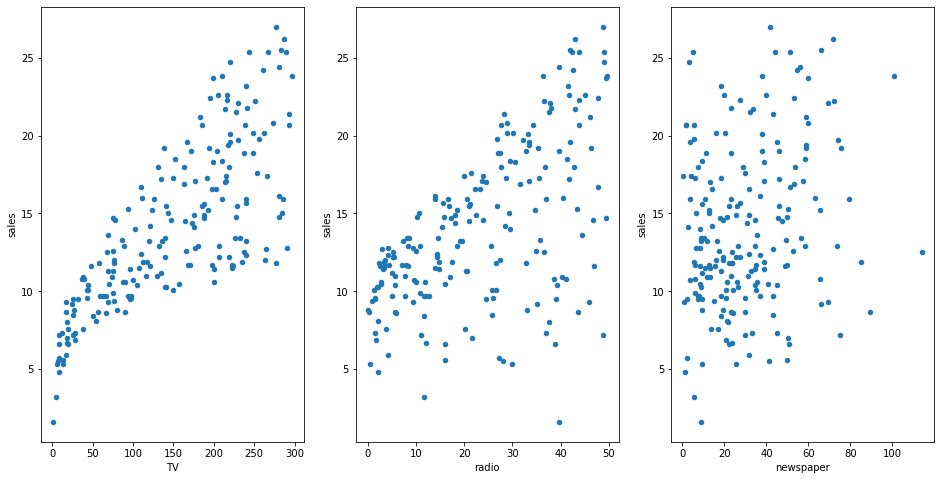

In [5]:
fig, axs = plt.subplots(1, 3)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16,8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2]);

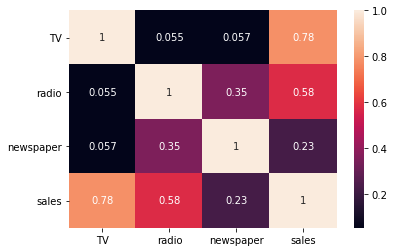

In [6]:
sns.heatmap(data.corr(), annot = True);

In [7]:
features = data[['TV', 'newspaper', 'radio']]
target = data[['sales']].values

Convert Features to Polynomial features

In [94]:

features_poly = PolynomialFeatures(degree= 30)

TV_poly = features_poly.fit_transform(features[['TV']])
newspaper_poly = features_poly.fit_transform(features[['newspaper']])
radio_poly = features_poly.fit_transform(features[['radio']])

In [95]:
#pd.DataFrame(TV_poly, columns = ['constant', 'TV', 'TV-squared'])

In [96]:
poly_features = pd.concat([pd.DataFrame(TV_poly),pd.DataFrame(newspaper_poly), pd.DataFrame(radio_poly)], axis = 1)

In [97]:
poly_features

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1.0,230.1,52946.01,1.218288e+07,2.803280e+09,6.450347e+11,1.484225e+14,3.415201e+16,7.858379e+18,1.808213e+21,...,1.340688e+33,5.067802e+34,1.915629e+36,7.241078e+37,2.737127e+39,1.034634e+41,3.910917e+42,1.478327e+44,5.588075e+45,2.112292e+47
1,1.0,44.5,1980.25,8.812112e+04,3.921390e+06,1.745019e+08,7.765333e+09,3.455573e+11,1.537730e+13,6.842899e+14,...,3.035593e+33,1.192988e+35,4.688443e+36,1.842558e+38,7.241254e+39,2.845813e+41,1.118404e+43,4.395329e+44,1.727364e+46,6.788542e+47
2,1.0,17.2,295.84,5.088448e+03,8.752131e+04,1.505366e+06,2.589230e+07,4.453476e+08,7.659979e+09,1.317516e+11,...,7.907995e+34,3.629770e+36,1.666064e+38,7.647235e+39,3.510081e+41,1.611127e+43,7.395074e+44,3.394339e+46,1.558002e+48,7.151227e+49
3,1.0,151.5,22952.25,3.477266e+06,5.268058e+08,7.981108e+10,1.209138e+13,1.831844e+15,2.775243e+17,4.204494e+19,...,8.608968e+33,3.555504e+35,1.468423e+37,6.064587e+38,2.504674e+40,1.034431e+42,4.272198e+43,1.764418e+45,7.287046e+46,3.009550e+48
4,1.0,180.8,32688.64,5.910106e+06,1.068547e+09,1.931933e+11,3.492935e+13,6.315227e+15,1.141793e+18,2.064362e+20,...,5.033834e+21,5.436540e+22,5.871464e+23,6.341181e+24,6.848475e+25,7.396353e+26,7.988061e+27,8.627106e+28,9.317275e+29,1.006266e+31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.0,38.2,1459.24,5.574297e+04,2.129381e+06,8.134237e+07,3.107278e+09,1.186980e+11,4.534265e+12,1.732089e+14,...,8.555319e+11,3.165468e+12,1.171223e+13,4.333526e+13,1.603405e+14,5.932597e+14,2.195061e+15,8.121725e+15,3.005038e+16,1.111864e+17
196,1.0,94.2,8873.64,8.358969e+05,7.874149e+07,7.417448e+09,6.987236e+11,6.581976e+13,6.200222e+15,5.840609e+17,...,3.119735e+14,1.528670e+15,7.490483e+15,3.670337e+16,1.798465e+17,8.812479e+17,4.318115e+18,2.115876e+19,1.036779e+20,5.080219e+20
197,1.0,177.0,31329.00,5.545233e+06,9.815062e+08,1.737266e+11,3.074961e+13,5.442681e+15,9.633545e+17,1.705137e+20,...,2.178422e+20,2.025932e+21,1.884117e+22,1.752229e+23,1.629573e+24,1.515503e+25,1.409417e+26,1.310758e+27,1.219005e+28,1.133675e+29
198,1.0,283.6,80428.96,2.280965e+07,6.468818e+09,1.834557e+12,5.202803e+14,1.475515e+17,4.184560e+19,1.186741e+22,...,1.225279e+34,5.146173e+35,2.161393e+37,9.077849e+38,3.812697e+40,1.601333e+42,6.725597e+43,2.824751e+45,1.186395e+47,4.982860e+48


In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, target, random_state = 6)

In [100]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 93)
(50, 93)
(150, 1)
(50, 1)


In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
my_model = LinearRegression()
my_model.fit(X_train, y_train)

LinearRegression()

#### Prediction and Evaluation on Train Data

In [103]:
preds_train = my_model.predict(X_train)
print('MAE : ', mean_absolute_error(y_train, preds_train))
print('MSE : ', mean_squared_error(y_train, preds_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(y_train, preds_train)))
print('R2 Score : ', my_model.score(X_train, y_train))

MAE :  3.634210778066631
MSE :  19.651128815855675
RMSE on Train Data : 4.432959374487395
R2 Score :  0.32026998677044627


#### Prediction and Evaluation on Test Data

In [104]:
preds = my_model.predict(X_test)
print('MAE : ', mean_absolute_error(y_test, preds))
print('MSE : ', mean_squared_error(y_test, preds))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(y_test,preds)))
print('R2 score : ', my_model.score(X_test, y_test)) 

MAE :  3.6081518622915825
MSE :  22.856999583610936
RMSE on Train Data : 4.780899453409466
R2 score :  -0.058247533515614514
